In [43]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline, BarycentricInterpolator


# Code provided by: 
# S. De Marchi, F. Marchetti, E. Perracchione, D. Poggiali, Polynomial interpolation via mapped bases without resampling,
# JCAM.
def fakenodes_interp(x,y,xx,S=None, degree=None):
    if S is None:
        #perform tradictional interpolation
        S=lambda x:x
    if degree is None:
        degree=len(x)-1
    #
    x_=S(x); xx_ = S(xx)
    P=np.polyfit(x_,y,degree)
    yy=np.polyval(P,xx_)
    #yy=lagrange_interp(xx_,x_,y)
    return yy

In [44]:
# reads in manually slightly cleaned data set
state_pops = pd.read_csv("../../data/state_populations.csv", header = 0)

# remove nas and assign row labels
state_pops = state_pops.dropna()
state_pops.index = state_pops["State"]

# remove the . before state names
for state in range(len(state_pops)):
    state_pops["State"].iloc[state] = state_pops["State"].iloc[state][1:]

# remove the duplicate column and commas from numbers
state_pops = state_pops.drop("State", 1)
state_pops = state_pops.replace(',', '', regex=True)
state_pops.astype("int")

# save the clean csv
state_pops.to_csv("../../data/state-populations-clean.csv")

In [45]:
state_pops = pd.read_csv("../../data/state-populations-clean.csv", index_col=0)
state_pops

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
Alabama,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532
Alaska,713982,722349,730810,737626,737075,738430,742575,740983,736624,733603,731158
Arizona,6407342,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401
Arkansas,2921998,2941038,2952876,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3030522
California,37319550,37636311,37944551,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39368078
Colorado,5047539,5121900,5193660,5270774,5352637,5454328,5543844,5617421,5697155,5758486,5807719
Connecticut,3579173,3588632,3595211,3595792,3595697,3588561,3579830,3575324,3574561,3566022,3557006
Delaware,899647,907590,915518,924062,933131,942065,949989,957942,966985,976668,986809
District of Columbia,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816


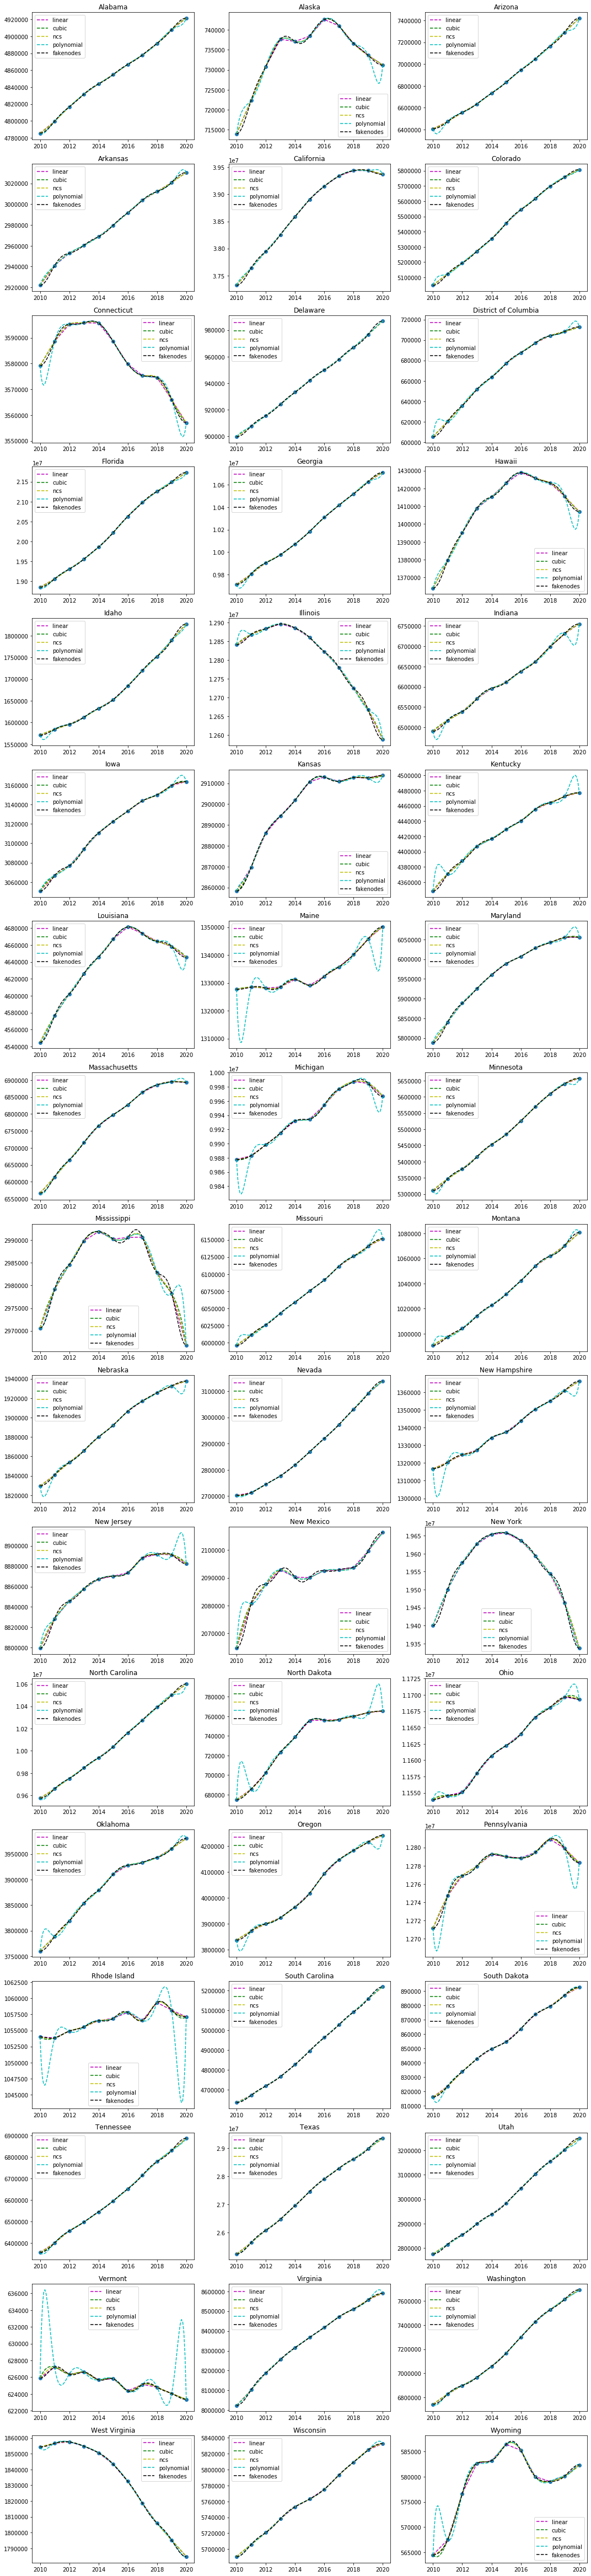

In [46]:
fig, ax = plt.subplots(17, 3)
for state in range(len(state_pops)):
    ax[state // 3, state % 3].scatter(state_pops.columns.astype("int"), state_pops.iloc[state])
    # ax[state // 5, state % 5].plot(state_pops.columns.astype("int"), state_pops.iloc[state])
    ax[state // 3, state % 3].set_title(str(state_pops.index[state]), fontsize=12)
    linear = interp1d(state_pops.columns.astype("int"), state_pops.iloc[state])
    cubic = interp1d(state_pops.columns.astype("int"), state_pops.iloc[state], kind="cubic")
    ncs = CubicSpline(state_pops.columns.astype("int"), state_pops.iloc[state], bc_type="natural")
    poly = BarycentricInterpolator(state_pops.columns.astype("int"), state_pops.iloc[state])
    new_times = np.linspace(2010, 2020, num = 121, endpoint=True)
    ax[state // 3, state % 3].plot(new_times, linear(new_times), 'm--', label='linear')
    ax[state // 3, state % 3].plot(new_times, cubic(new_times), 'g--', label='cubic')
    ax[state // 3, state % 3].plot(new_times, ncs(new_times), 'y--', label='ncs')
    ax[state // 3, state % 3].plot(new_times, poly(new_times), 'c--', label='polynomial')
    ax[state // 3, state % 3].plot(new_times, fakenodes_interp(state_pops.columns.astype("int"), state_pops.iloc[state],new_times,
                                    S=lambda x: -5*np.cos(np.pi*(x-2010)/10), degree=None), "k--", label='fakenodes')
    ax[state // 3, state % 3].legend()
fig.set_size_inches(15,65)
fig.tight_layout()
fig.savefig('../../images/population-interpolations.png')

In [47]:
def interpolate_covid(state_pops, interval = 1/12):
    
    # populates a dictionary with all interpolation estimates
    pop_interps = {}
    for state in range(len(state_pops)):
        linear = interp1d(state_pops.columns.astype("int"), state_pops.iloc[state])
        cubic = interp1d(state_pops.columns.astype("int"), state_pops.iloc[state], kind="cubic")
        ncs = CubicSpline(state_pops.columns.astype("int"), state_pops.iloc[state], bc_type="natural")
        poly = BarycentricInterpolator(state_pops.columns.astype("int"), state_pops.iloc[state])
        bins = np.linspace(2019,2020,round(1/interval + 1))
        pop_interps[str(state_pops.index[state])] = {}
        pop_interps[str(state_pops.index[state])]['linear'] = linear(bins).round()
        pop_interps[str(state_pops.index[state])]['cubic'] = cubic(bins).round()
        pop_interps[str(state_pops.index[state])]['ncs'] = ncs(bins).round()
        pop_interps[str(state_pops.index[state])]['polynomial'] = poly(bins).round()
        pop_interps[str(state_pops.index[state])]['fakenodes'] = fakenodes_interp(state_pops.columns.astype("int"), state_pops.iloc[state],bins,
                                        S=lambda x: -5*np.cos(np.pi*(x-2010)/10), degree=None).round()
    
    # writes each interpolation estimate to its respective .csv file
    for interp_type in ['linear', 'cubic', 'ncs', 'polynomial', 'fakenodes']:
        interp_data = pd.DataFrame([], index=state_pops.index, 
                                   columns=["07/19", "08/19","09/19","10/19","11/19","12/19","01/20","02/20","03/20","04/20","05/20","06/20","07/20"])
        for state in range(len(state_pops)):
            interp_data.loc[state_pops.index[state],:] = pop_interps[str(state_pops.index[state])][interp_type]
        interp_data.to_csv('../../data/population-by-' + str(interp_type) + '.csv')
    
    # return the dictionary used to make the estimates
    return pop_interps

In [49]:
interpolate_covid(state_pops)

{'Alabama': {'linear': array([4907965., 4909096., 4910226., 4911357., 4912487., 4913618.,
         4914748., 4915879., 4917010., 4918140., 4919271., 4920401.,
         4921532.]),
  'cubic': array([4907965., 4909293., 4910598., 4911876., 4913124., 4914336.,
         4915510., 4916642., 4917728., 4918764., 4919745., 4920670.,
         4921532.]),
  'ncs': array([4907965., 4909225., 4910451., 4911646., 4912814., 4913957.,
         4915079., 4916183., 4917271., 4918347., 4919414., 4920474.,
         4921532.]),
  'polynomial': array([4907965., 4908873., 4909661., 4910338., 4910923., 4911450.,
         4911974., 4912568., 4913338., 4914419., 4915988., 4918267.,
         4921532.]),
  'fakenodes': array([4907965., 4909643., 4911314., 4912952., 4914526., 4916008.,
         4917368., 4918576., 4919605., 4920433., 4921038., 4921408.,
         4921532.])},
 'Alaska': {'linear': array([733603., 733399., 733195., 732992., 732788., 732584., 732380.,
         732177., 731973., 731769., 731566., 731

In [48]:
# Uncomment the code below for creation of individual images.

# for i in range(len(state_pops)):
#     fig, ax = plt.subplots()
#     state = i
#     ax.scatter(state_pops.columns.astype("int"), state_pops.iloc[state])
#     ax.set_title(str(state_pops.index[state]), fontsize=21)
#     linear = interp1d(state_pops.columns.astype("int"), state_pops.iloc[state])
#     cubic = interp1d(state_pops.columns.astype("int"), state_pops.iloc[state], kind="cubic")
#     ncs = CubicSpline(state_pops.columns.astype("int"), state_pops.iloc[state], bc_type="natural")
#     poly = BarycentricInterpolator(state_pops.columns.astype("int"), state_pops.iloc[state])
#     new_times = np.linspace(2010, 2020, num = 121, endpoint=True)
#     ax.plot(new_times, linear(new_times), 'm--', label='linear')
#     ax.plot(new_times, cubic(new_times), 'g--', label='cubic')
#     ax.plot(new_times, ncs(new_times), 'y--', label='ncs')
#     ax.plot(new_times, poly(new_times), 'c--', label='polynomial')
#     ax.plot(new_times, fakenodes_interp(state_pops.columns.astype("int"), state_pops.iloc[state],new_times,
#                                         S=lambda x: -5*np.cos(np.pi*(x-2010)/10), degree=None), "k--", label='fakenodes')
#     ax.legend()
#     fig.set_size_inches(8,6)
#     fig.savefig('../images/by_state/' + str(state_pops.index[state]) + '_pop_interp.png')